In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## [Методы каротажа](https://ru.wikipedia.org/wiki/Каротаж)
### Методы электрического каротажа
#### Группа методов кажущегося сопротивления (КС) собственно 
- **КС** — кажущееся сопротивление с нефокусированными зондами. Самый распространённый метод данной группы, являющийся скважинным аналогом метода электрического профилирования в электроразведке
- **резистивиметрия (REZ)**. С помощью этого метода измеряют удельное электрическое сопротивление жидкости, заполняющей в данный момент скважину. Жидкость может быть представлена как буровым раствором (его сопротивление заранее известно), так и пластовыми флюидами (нефть, пресная или минерализованная вода), а также их смесью
- **БКЗ** — боковое каротажное зондирование. Данный метод является скважинным аналогом метода вертикального электрического зондирования в электроразведке
- **микрокаротаж** — разновидность КС с зондами очень малого размера, вплотную прижимаемыми к стенкам скважины. С помощью данного метода, преимущественно, ищут только коллекторы по скважине
- **БК** — боковой каротаж. Отличие от классического КС заключается в фокусировке тока зондом
- **МБК** — микробоковой каротаж. Отличие данного метода от микрокаротажа заключается в фокусировке тока зондом

#### Группа электромагнитных методов
Основное преимущество данной группы методов заключается в том, что их возможно использовать в сухих скважинах, не заполненных токопроводящим буровым раствором. Кроме того, его возможно применять и в скважинах, заполненных буровым раствором на основе нефти, которые тоже не проводят постоянный электрический ток. Встречаются следующие разновидности:

- **ИК** — индукционный каротаж. При проведении используют сравнительно низкие частоты — до 200 кГц<br>
индукционный каротаж на высоких частотах, результаты которого зависят как от электропроводности пород, так и от их диэлектрической проницаемости:
- **ВМП** — волновой метод проводимости с частотой 1-5 МГц
- **ВДК** — волновой диэлектрический каротаж с частотой до 60 МГц
- **ВЭМКЗ** - высокочастотное электромагнитное каротажное зондирование
- **ВИКИЗ** — высокочастотное индукционное каротажное изопараметрическое зондирование. Метод является аналогом БКЗ, но вместо постоянного тока используется переменный

#### Группа методов электрохимической активности
- **ПС** — метод самопроизвольной поляризации, также известный как метод потенциалов самопроизвольной поляризации. Является скважинным аналогом метода естественного поля в электроразведке
- **ЭК** — электролитический каротаж. Скважинный аналог метода вызванной поляризации в электроразведке
- **МЭП** — метод электродных потенциалов. Данный метод существует исключительно в скважинном варианте и не имеет аналогов в полевой электроразведке

### Методы радиоактивного каротажа
#### Группа гамма-методов
- **ГК** — гамма-каротаж. Очень простой и распространённый метод, измеряющий только естественное гамма-излучение от пород, окружающих скважину. Существует его чуть более усложнённый вариант — спектрометрический гамма-каротаж (СГК или ГК-С), который позволяет различить попавшие в детектор геофизического зонда гамма-кванты по их энергии. По этому параметру можно точнее судить о характере слагающих толщу пород.
- **ГГК** — гамма-гамма каротаж. Геофизический зонд облучает породу гамма-излучением, в результате которого порода становится радиоактивной и в ответ тоже излучает гамма-кванты. Именно эти кванты и регистрируются зондом. Существует две основных разновидности метода:
    - плотностная — ГГК-П (иногда встречается обозначение ПГГК)
    - селективная — ГГК-С (может обозначаться как Z-ГГК, С-ГГК и т. п.)
- **РРК** — рентгенорадиометрический каротаж. Его название формально не соответствует общепринятой системе, поэтому иногда встречается название ГРК (гамма-рентгеновский каротаж), но РРК является общеупотребимым.


## Загрузка данных

Загружаем расшифровки литологий

In [2]:
data_source = '../data/digdes-data/coal-wells-1/'

In [3]:
lithology = pd.read_excel(data_source + 'Литология.xlsx')
lithology.index = lithology['Литология'].values
lithology.drop(['Литология'], inplace=True, axis=1)
lithology = lithology.to_dict()['порода ']

In [4]:
lithology

{1: 'песчаник',
 2: 'Аргиллит алевритовый',
 3: 'Аргиллит',
 4: 'Гравелит ',
 5: 'алевролит',
 6: 'Аргиллит углистый',
 7: 'Уголь',
 8: 'Супесь ',
 9: 'Суглинок',
 10: 'Валунно-галечные отложения',
 11: 'песок'}

In [5]:
def print_value_counts_maped(dtf, val):
    for v, k in dtf[val].value_counts().items():
        if v in lithology.keys():
            print('{} : {}'.format(lithology[int(v)], k))
        else:
            print('{} : {}'.format(v, k))

### Одиночные скважины

In [6]:
dtf_210 = pd.read_csv(data_source + '210.csv', sep=';', decimal=',', encoding='cp1251')
# Заменяем столбцы dtf_210 на общепринятые
dtf_210.columns = ['Dept', 'BK', 'DS', 'GGK(p)', 'KS', 'REZ', 'GR', 'LIT']

dtf_628 = pd.read_csv(data_source + '628.csv', sep=';', decimal=',', encoding='cp1251')
dtf_1763 = pd.read_csv(data_source + '1763.csv',  sep=';', decimal=',', encoding='cp1251')
dtf_1093 = pd.read_csv(data_source + '1093.csv',  sep=';', decimal=',', encoding='cp1251')

In [7]:
dtf_210.shape, dtf_628.shape, dtf_1763.shape, dtf_1093.shape

((17547, 8), (22446, 7), (8862, 8), (16394, 8))

In [8]:
dtf_210.head(3)

,Dept,BK,DS,GGK(p),KS,REZ,GR,LIT
0,0.84,-999.25,-999.25,-999.25,-999.25,-999.25,3.237,8.0
1,0.86,-999.25,-999.25,-999.25,-999.25,-999.25,3.237,8.0
2,0.88,-999.25,-999.25,-999.25,-999.25,-999.25,3.108,8.0


In [7]:
dtf_1093.head(3)

,Dept,GGK(p),DS,GR,BK,KS,REZ,LIT
0,3.02,-999.25,-999.25,-999.25,-999.25,-999.25,0.786,-999.25
1,3.04,-999.25,-999.25,-999.25,-999.25,-999.25,0.786,-999.25
2,3.06,-999.25,-999.25,-999.25,-999.25,-999.25,0.789,-999.25


In [8]:
dtf_1763.head(3)

,Dept,GGK(p),DS,GR,KS,BK,REZ,LIT
0,1.79,-999.25,-999.25,2.540,-999.25,-999.25,0.789,-999.25
1,1.81,-999.25,-999.25,2.540,-999.25,-999.25,0.789,-999.25
2,1.83,-999.25,-999.25,2.717,-999.25,-999.25,0.793,-999.25


In [9]:
dtf_628.head(3)

,Dept,GGK(p),DS,GR,BK,REZ,LIT
0,2.10,-999.25,-999.25,-999.25,-999.25,0.790,-999.25
1,2.12,-999.25,-999.25,-999.25,-999.25,0.790,-999.25
2,2.14,-999.25,-999.25,-999.25,-999.25,0.793,-999.25


In [9]:
dtf_210.LIT.astype('category', copy=False)
dtf_1763.LIT.astype('category', copy=False)
dtf_1093.LIT.astype('category', copy=False)
dtf_628.LIT.astype('category', copy=False)
print()

In [10]:
dtf_210[dtf_210 == -999.25] = np.nan
dtf_1763[dtf_1763 == -999.25] = np.nan
dtf_1093[dtf_1093 == -999.25] = np.nan
dtf_628[dtf_628 == -999.25] = np.nan

Text(0.5,1,'dtf_628')

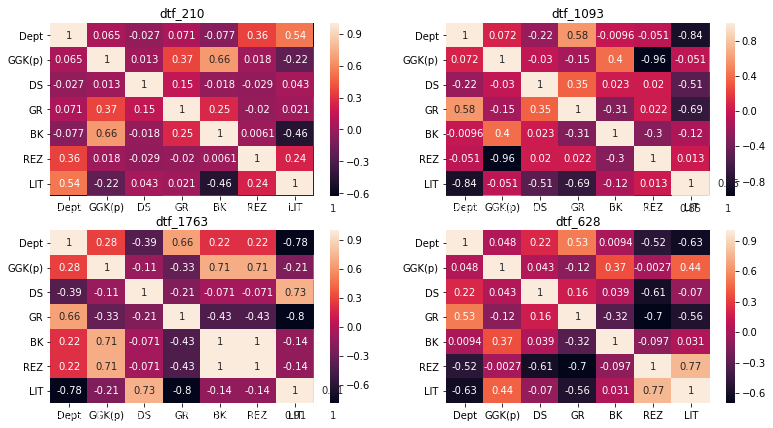

In [243]:
fig, axis = plt.subplots(2, 2, figsize=(13, 7), sharex=True, sharey=True)
sns.heatmap(dtf_210.corr(), annot=True, ax=axis[0, 0])
axis[0, 0].set_title('dtf_210')
sns.heatmap(dtf_1093.corr(), annot=True, ax=axis[0, 1])
axis[0, 1].set_title('dtf_1093')
sns.heatmap(dtf_1763.corr(), annot=True, ax=axis[1, 0])
axis[1, 0].set_title('dtf_1763')
sns.heatmap(dtf_628.corr(), annot=True, ax=axis[1, 1])
axis[1, 1].set_title('dtf_628')

#### 

### [Куст скважин](https://www.google.ru/search?q=%D0%BA%D1%83%D1%81%D1%82+%D1%81%D0%BA%D0%B2%D0%B0%D0%B6%D0%B8%D0%BD&newwindow=1&client=safari&rls=en&dcr=0&tbm=isch&source=iu&pf=m&ictx=1&fir=9ca7KdUffmDkkM%253A%252CxWarwb_k1F4EHM%252C_&usg=__koPjYzig1ThzCyw5PTk-gc2FicY%3D&sa=X&ved=0ahUKEwiElrvMtu3WAhUiOpoKHXORApkQ9QEIKTAA#imgrc=9ca7KdUffmDkkM:)

In [376]:
lithology

{1: 'песчаник',
 2: 'Аргиллит алевритовый',
 3: 'Аргиллит',
 4: 'Гравелит ',
 5: 'алевролит',
 6: 'Аргиллит углистый',
 7: 'Уголь',
 8: 'Супесь ',
 9: 'Суглинок',
 10: 'Валунно-галечные отложения',
 11: 'песок'}

In [11]:
dtf_1790_1 = pd.read_csv(data_source + '1790-1.csv', sep=';', decimal=',', encoding='cp1251')
if 'Unnamed: 7' in dtf_1790_1.columns:
    dtf_1790_1.drop(['Unnamed: 7'], inplace=True, axis=1)
if 'Unnamed: 8' in dtf_1790_1.columns:
    dtf_1790_1.drop(['Unnamed: 8'], inplace=True, axis=1)
dtf_1790_2 = pd.read_csv(data_source + '1790-2.csv', sep=';', decimal=',', encoding='cp1251')
dtf_1790_3 = pd.read_csv(data_source + '1790-3.csv', sep=';', decimal=',', encoding='cp1251')
dtf_1790_4 = pd.read_csv(data_source + '1790-4.csv', sep=';', decimal=',', encoding='cp1251')

In [12]:
dtf_1790_1.shape, dtf_1790_2.shape, dtf_1790_3.shape, dtf_1790_4.shape

((5937, 7), (5900, 7), (5730, 7), (5588, 7))

In [236]:
dtf_1790_4.head(3)

,Dept,GGK(p),DS,GR,LIT,BK,REZ
0,3.40,NaN,NaN,NaN,NaN,NaN,0.813
1,3.42,NaN,NaN,NaN,NaN,NaN,0.813
2,3.44,NaN,NaN,NaN,NaN,NaN,0.834


In [238]:
dtf_1790_2[dtf_1790_2.Dept > 100]

,Dept,GGK(p),DS,GR,LIT,BK,REZ
4755,100.02,123385.000,99.665,6.694,1.0,399.942,0.714
4756,100.04,123700.000,99.665,6.686,1.0,422.109,0.714
4757,100.06,123020.000,99.665,6.708,1.0,455.158,0.715
4758,100.08,122050.000,99.665,6.886,1.0,466.024,0.714
4759,100.10,122520.000,99.665,6.731,1.0,448.198,0.715
4760,100.12,122270.000,99.665,6.553,1.0,425.018,0.716
4761,100.14,122300.000,99.665,6.930,1.0,403.411,0.715
4762,100.16,123536.664,99.665,7.152,1.0,369.139,0.715
4763,100.18,124420.000,99.665,6.664,1.0,341.528,0.715
4764,100.20,124708.000,99.665,6.686,1.0,327.614,0.715


In [13]:
dtf_1790_1[dtf_1790_1 == -999.25] = np.nan
dtf_1790_2[dtf_1790_2 == -999.25] = np.nan
dtf_1790_3[dtf_1790_3 == -999.25] = np.nan
dtf_1790_4[dtf_1790_4 == -999.25] = np.nan

In [247]:
dtf_1790_1.LIT.astype('category', copy=False)
dtf_1790_2.LIT.astype('category', copy=False)
dtf_1790_3.LIT.astype('category', copy=False)
dtf_1790_4.LIT.astype('category', copy=False)
print()

/Volumes/Media/Documents/Programming/Git/(DD)-gitlab-projects/carrot/venv/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Volumes/Media/Documents/Programming/Git/(DD)-gitlab-projects/carrot/venv/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


ValueError: max must be larger than min in range parameter.

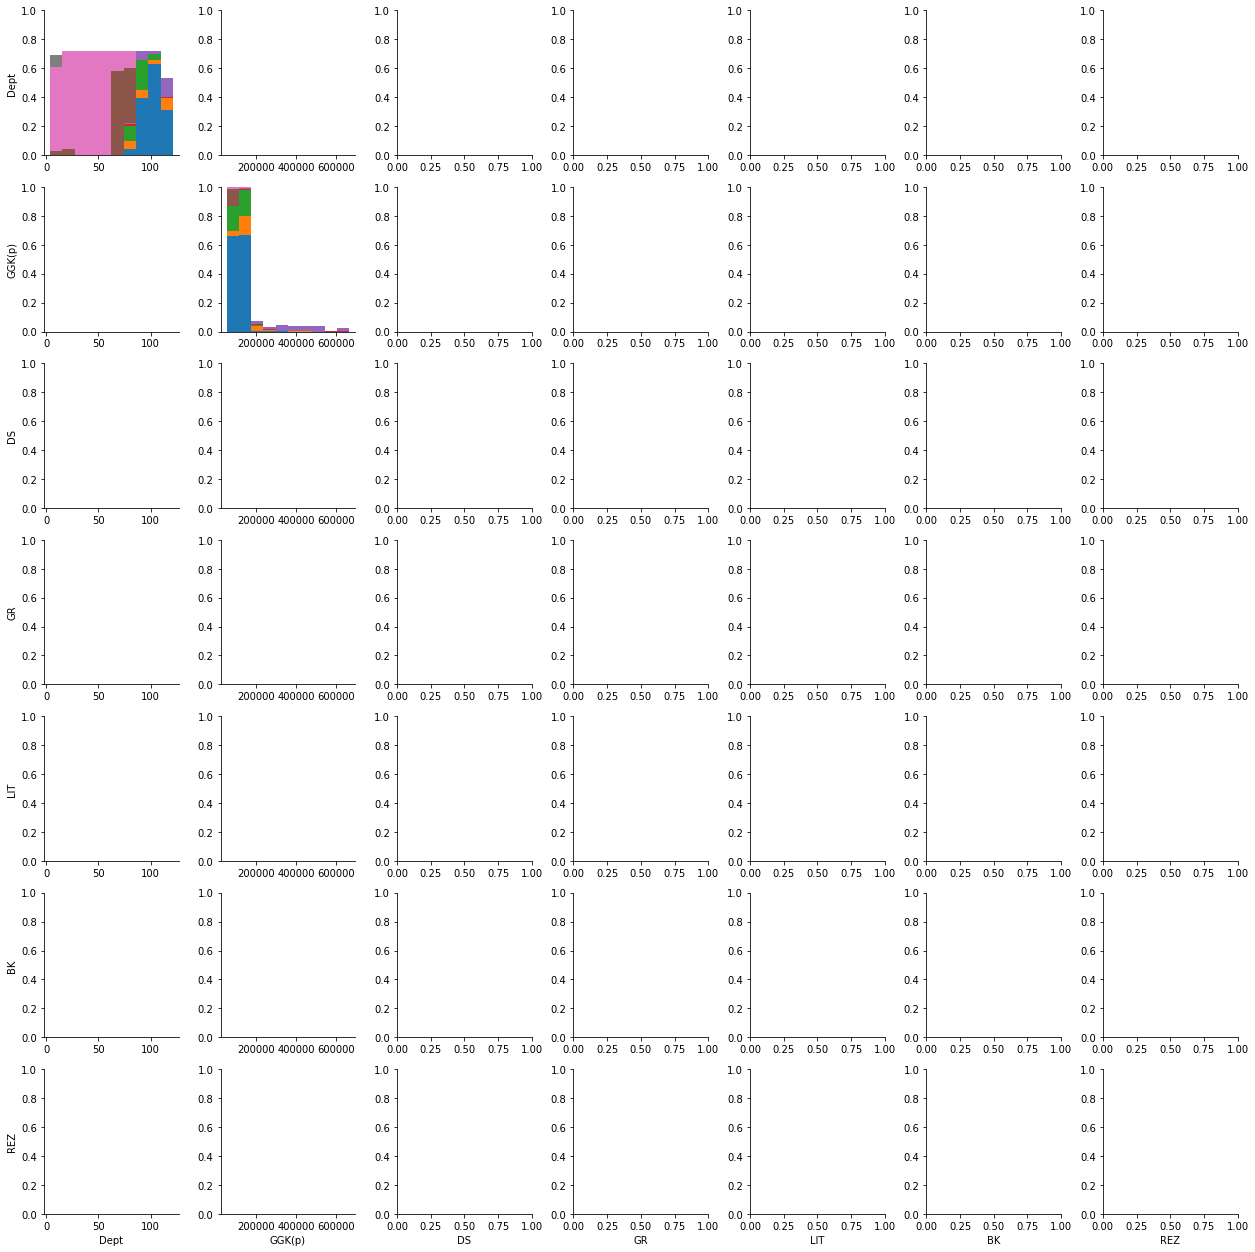

In [234]:
sns.pairplot(pd.concat([dtf_1790_1, dtf_1790_2, dtf_1790_3, dtf_1790_4], ignore_index=True), hue='LIT')

Text(0.5,1,'dtf_1790_4')

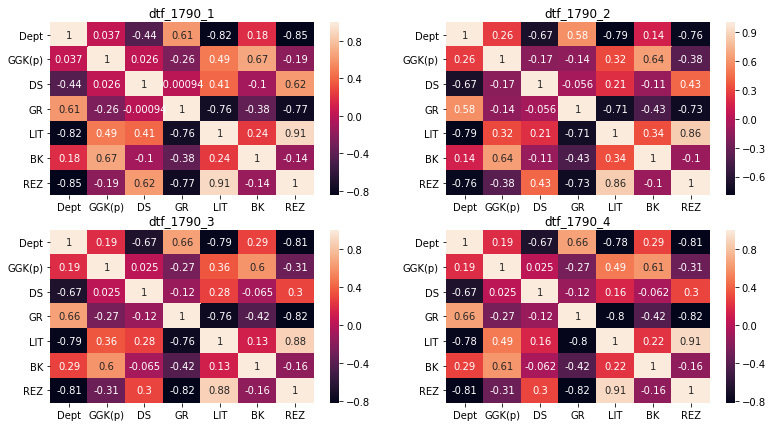

In [248]:
fig, axis = plt.subplots(2, 2, figsize=(13, 7))
sns.heatmap(dtf_1790_1.corr(), annot=True, ax=axis[0, 0])
axis[0, 0].set_title('dtf_1790_1')
sns.heatmap(dtf_1790_2.corr(), annot=True, ax=axis[0, 1])
axis[0, 1].set_title('dtf_1790_2')
sns.heatmap(dtf_1790_3.corr(), annot=True, ax=axis[1, 0])
axis[1, 0].set_title('dtf_1790_3')
sns.heatmap(dtf_1790_4.corr(), annot=True, ax=axis[1, 1])
axis[1, 1].set_title('dtf_1790_4')

#### Выводы по кусту скважин
- Первое, что бросается в глаза, это то что `LIT` сильно коррелирует с `REZ`.
- Наблюдается достаточно большая негативная корреляция между `LIT` и `Dept`, `GR`.

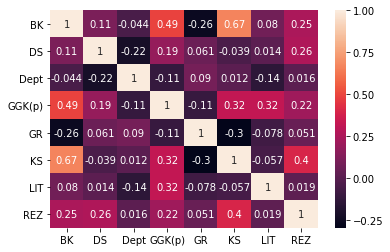

In [72]:
# 
sns.heatmap(pd.concat([dtf_210[dtf_210.Dept > 100], dtf_1093[dtf_1093.Dept > 100], 
                       dtf_628[dtf_628.Dept > 100], dtf_1763[dtf_1763.Dept > 100], 
                       dtf_1790_1[dtf_1790_1.Dept > 100], dtf_1790_2[dtf_1790_2.Dept > 100], 
                       dtf_1790_3[dtf_1790_3.Dept > 100], dtf_1790_4[dtf_1790_4.Dept > 100]], 
                      ignore_index=True).corr(),
            annot=True)

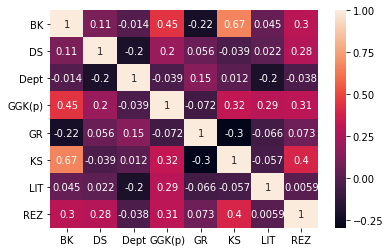

In [73]:
# 
sns.heatmap(pd.concat([dtf_210[dtf_210.Dept > 100], dtf_1093[dtf_1093.Dept > 100], 
                       dtf_628[dtf_628.Dept > 100], dtf_1763[dtf_1763.Dept > 100]], 
                      ignore_index=True).corr(),
            annot=True)

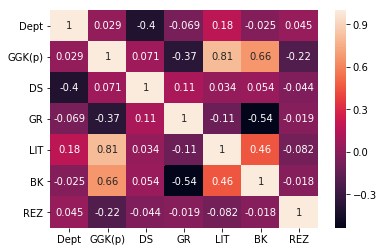

In [71]:
sns.heatmap(pd.concat([dtf_1790_1[dtf_1790_1.Dept > 100], dtf_1790_2[dtf_1790_2.Dept > 100], 
                       dtf_1790_3[dtf_1790_3.Dept > 100], dtf_1790_4[dtf_1790_4.Dept > 100]], 
                      ignore_index=True).corr(),
            annot=True)

## Learning with Random Forest

In [14]:
# убрал KS, 'DS', 'REZ'
X_data = ['GR', 'BK', 'GGK(p)', 'KS']
y_data = 'LIT'

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [16]:
# excluded: dtf_1790_4[dtf_1790_4.Dept > 100]
dtf_concated = pd.concat([dtf_1790_1[dtf_1790_1.Dept > 100], dtf_1790_2[dtf_1790_2.Dept > 100], 
                          dtf_1790_3[dtf_1790_3.Dept > 100], dtf_210[dtf_210.Dept > 100], 
                          dtf_1093[dtf_1093.Dept > 100], dtf_628[dtf_628.Dept > 100]],
                        ignore_index=True)
hiden_data = dtf_1763[dtf_1763.Dept > 100]

In [210]:
dtf_concated.fillna(-9999, inplace=True)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(dtf_concated.dropna()[X_data], dtf_concated.dropna()[y_data], test_size=0.3)

In [257]:
scaler = StandardScaler()
x_train_sclaed = scaler.fit_transform(x_train.dropna())
x_test_scaled = scaler.transform(x_test.dropna())

In [96]:
x_val = scaler.transform(dtf_1763.dropna()[X_data_val])
y_val = dtf_1763.dropna().LIT
y_val = y_val.apply(int)

In [115]:
x_val = scaler.transform(dtf_1093.dropna()[X_data_val])
y_val = dtf_1093.dropna().LIT
y_val = y_val.apply(int)

In [58]:
y_train = y_train.applymap(int)
y_test = y_test.applymap(int)

In [88]:
clf = RandomForestClassifier(class_weight='balanced')
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [89]:
clf.score(x_train, y_train), clf.score(x_test, y_test)

(0.99047436389208543, 0.80104399701715134)

In [363]:
clf.feature_importances_

array([ 0.20487925,  0.27688348,  0.22425385,  0.29398342])

In [377]:
lithology

{1: 'песчаник',
 2: 'Аргиллит алевритовый',
 3: 'Аргиллит',
 4: 'Гравелит ',
 5: 'алевролит',
 6: 'Аргиллит углистый',
 7: 'Уголь',
 8: 'Супесь ',
 9: 'Суглинок',
 10: 'Валунно-галечные отложения',
 11: 'песок'}

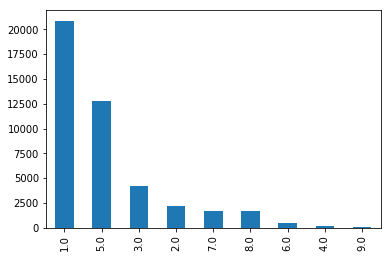

In [17]:
dtf_concated[y_data].value_counts().plot(kind='bar')

In [92]:
from sklearn.metrics import classification_report

In [93]:
print(classification_report(y_test, clf.predict(x_test)))

             precision    recall  f1-score   support

        1.0       0.85      0.89      0.87      2999
        2.0       0.68      0.54      0.60       504
        3.0       0.67      0.66      0.67       428
        4.0       0.80      0.64      0.71        73
        5.0       0.78      0.78      0.78      2364
        6.0       0.54      0.32      0.40        82
        7.0       0.89      0.89      0.89       209
        8.0       1.00      1.00      1.00        46

avg / total       0.80      0.80      0.80      6705



In [367]:
for c, imp in zip(X_data, clf.feature_importances_):
    print(c, imp)

GR 0.204879254494
BK 0.276883475466
GGK(p) 0.224253852293
KS 0.293983417746


In [19]:
hiden_data.fillna(-9999, inplace=True)

/Volumes/Media/Documents/Programming/Git/(DD)-gitlab-projects/carrot/venv/lib/python3.6/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [90]:
clf.score(hiden_data.dropna()[X_data], hiden_data.dropna()[y_data])

0.54981672775741419

In [378]:
lithology

{1: 'песчаник',
 2: 'Аргиллит алевритовый',
 3: 'Аргиллит',
 4: 'Гравелит ',
 5: 'алевролит',
 6: 'Аргиллит углистый',
 7: 'Уголь',
 8: 'Супесь ',
 9: 'Суглинок',
 10: 'Валунно-галечные отложения',
 11: 'песок'}

In [94]:
# Обучение на данных из одного куста, а валидация на dtf_1790_4-ой скважине
print('Данные из разных колодцев')
print(classification_report(hiden_data.dropna()[y_data], clf.predict(hiden_data.dropna()[X_data])))
print('Данные из одноих колодцев')
print(print(classification_report(y_test, clf.predict(x_test))))

Данные из разных колодцев
             precision    recall  f1-score   support

        1.0       0.83      0.53      0.65      1080
        2.0       0.37      0.24      0.30       184
        3.0       0.84      0.14      0.23       422
        5.0       0.45      0.88      0.59       919
        6.0       0.00      0.00      0.00        46
        7.0       0.91      0.83      0.87       206
        8.0       0.00      0.00      0.00         0
        9.0       0.00      0.00      0.00       144

avg / total       0.64      0.55      0.52      3001

Данные из одноих колодцев
             precision    recall  f1-score   support

        1.0       0.85      0.89      0.87      2999
        2.0       0.68      0.54      0.60       504
        3.0       0.67      0.66      0.67       428
        4.0       0.80      0.64      0.71        73
        5.0       0.78      0.78      0.78      2364
        6.0       0.54      0.32      0.40        82
        7.0       0.89      0.89      0.89 

/Volumes/Media/Documents/Programming/Git/(DD)-gitlab-projects/carrot/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Volumes/Media/Documents/Programming/Git/(DD)-gitlab-projects/carrot/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [100]:
# Обучение на всех данных, а валидация на 210-ой скважине
print('Данные из разных колодцев')
print(classification_report(hiden_data[y_data], clf.predict(hiden_data[X_data])))
print('Данные из одноих колодцев')
print(print(classification_report(y_test, clf.predict(x_test))))

Данные из разных колодцев
             precision    recall  f1-score   support

    -9999.0       0.00      0.00      0.00       183
        2.0       0.00      0.00      0.00       320
        3.0       0.00      0.00      0.00      1697
        6.0       0.11      0.05      0.07       842
        9.0       0.20      0.82      0.33      2232
       15.0       0.00      0.00      0.00      1209
       18.0       0.03      0.03      0.03       197
       24.0       0.00      0.00      0.00       218
       27.0       0.00      0.00      0.00       876
       28.0       0.18      0.03      0.05      3574
       30.0       0.06      0.01      0.02        97
       32.0       0.00      0.00      0.00        20
       34.0       0.31      0.87      0.45       354
       48.0       0.00      0.00      0.00       769
       49.0       0.00      0.00      0.00         0

avg / total       0.11      0.18      0.09     12588

Данные из одноих колодцев
             precision    recall  f1-score  

/Volumes/Media/Documents/Programming/Git/(DD)-gitlab-projects/carrot/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Volumes/Media/Documents/Programming/Git/(DD)-gitlab-projects/carrot/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [126]:
pd.Series.value_counts(clf.predict(x_val))

32.0    11004
dtype: int64

In [73]:
from sklearn.linear_model import SGDClassifier

In [127]:
clf = SGDClassifier()
clf.fit(x_train_sclaed, y_train)

/Volumes/Media/Documents/Programming/Git/(DD)-gitlab-projects/carrot/venv/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Volumes/Media/Documents/Programming/Git/(DD)-gitlab-projects/carrot/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [75]:
clf.score(x_test_scaled, y_test)

0.51467596628886947

In [77]:
print(classification_report(y_test, clf.predict(x_test_scaled)))

             precision    recall  f1-score   support

          2       0.00      0.00      0.00        96
          3       0.66      0.74      0.70       497
          6       0.32      0.38      0.34       249
          9       0.41      0.23      0.29       597
         15       0.37      0.41      0.39       376
         18       0.00      0.00      0.00        34
         24       0.49      0.84      0.62        62
         27       0.00      0.00      0.00       274
         28       0.53      0.83      0.65      1033
         30       0.00      0.00      0.00        28
         32       0.00      0.00      0.00         4
         34       0.66      0.35      0.46       114
         48       1.00      0.94      0.97        77

avg / total       0.44      0.51      0.46      3441



/Volumes/Media/Documents/Programming/Git/(DD)-gitlab-projects/carrot/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
dtf_concated.shape

(48758, 8)

In [55]:
dtf_concated.LIT = dtf_concated.LIT.astype('category', copy=False)

In [62]:
dtf_concated.replace(-999.25, np.nan, inplace=True)

## Baseline algorithm
Идея: Найти минимумальные и максимальные значения для значений методов\*. Затем, на отложенной скважине посчитать попадание значений методов в полученные минимумы и максимумы.

\*Метод -- это метод оценки литологии (Гамма каротаж, ПС, etc.)

In [269]:
lit_dict_descr = dict()
lit_dict = dict()

In [270]:
for lit in dtf_concated.dropna().LIT.unique():
    if not pd.isnull(lit):
        descr = dtf_concated.dropna()[dtf_concated.dropna().LIT == lit].describe()
        intervals = dict()
        for v in descr.columns:
            intervals[v] = (descr[v]['min'], descr[v]['max'])
        lit_dict_descr[lithology[lit]] = intervals
        lit_dict[lit] = intervals

In [375]:
pd.DataFrame(lit_dict_descr)

,Аргиллит,Аргиллит алевритовый,Аргиллит углистый,Гравелит,Суглинок,Супесь,Уголь,алевролит,песчаник
BK,"(6.708, 413.064)","(6.784, 1399.313)","(8.256, 2356.688)","(49.222, 203.979)","(0.289, 0.848)","(0.339, 9.109)","(8.855, 7278.168)","(0.891, 569.491)","(6.035, 2325.65)"
DS,"(95.993, 421.818)","(95.899, 108.281)","(96.367, 155.139)","(96.454, 96.988)","(100.61, 100.905)","(102.353, 106.052)","(95.899, 322.81)","(95.899, 176.051)","(95.899, 199.815)"
Dept,"(109.72, 335.66)","(124.99, 346.96)","(118.74, 335.82)","(175.0, 199.46)","(117.67, 120.53)","(112.46, 115.38)","(123.09, 339.78)","(114.52, 328.58)","(108.52, 347.58)"
GGK(p),"(62950.0, 482251.438)","(80635.0, 549800.0)","(96795.0, 364403.344)","(96784.0, 133045.0)","(47396.0, 92530.0)","(50165.0, 153370.0)","(96210.0, 741364.0)","(51330.0, 406636.0)","(60405.0, 469675.0)"
GR,"(4.692, 19.725)","(4.292, 19.747)","(2.793, 16.247)","(2.988, 6.796)","(3.138, 6.287)","(5.091, 10.73)","(0.766, 15.681)","(5.068, 18.444)","(1.628, 14.578)"
KS,"(1.917, 535.756)","(2.138, 939.661)","(1.908, 5456.719)","(273.534, 1645.374)","(0.289, 0.848)","(0.011, 0.073)","(1.636, 4256.571)","(0.891, 760.751)","(0.029, 6695.274)"
LIT,"(3.0, 3.0)","(2.0, 2.0)","(6.0, 6.0)","(4.0, 4.0)","(9.0, 9.0)","(8.0, 8.0)","(7.0, 7.0)","(5.0, 5.0)","(1.0, 1.0)"
REZ,"(0.687, 3.539)","(0.686, 3.429)","(0.684, 3.551)","(3.176, 3.305)","(0.781, 0.826)","(3.034, 3.173)","(0.684, 3.595)","(0.681, 3.628)","(0.672, 3.628)"


In [272]:
lit_dtf = pd.DataFrame(lit_dict)

In [273]:
def in_interval(value, vals):
    """
    check if value between values
    """
    return int(vals[0] <= value <= vals[1])

In [306]:
hiden_data.columns

Index(['Dept', 'GGK(p)', 'DS', 'GR', 'LIT', 'BK', 'REZ'], dtype='object')

In [371]:
X_validation_cols = ['GGK(p)', 'GR', 'BK', 'REZ', 'KS']

In [372]:
# Список для сохранения вероятностей
probs = []
# Порог для "вероятности"
threshold = 0
for row in hiden_data[X_validation_cols].dropna().iterrows():
    dtf_ = pd.DataFrame(columns=[k for k in lit_dict.keys()], 
                        index=hiden_data[X_validation_cols].columns)
    for it, val in row[1].items():
        if it in lit_dtf.index:
#             Проверка, входит ли значение метода в интервал
            mask = lit_dtf.loc[it].apply(lambda x : in_interval(val, x))
            dtf_.loc[it] = mask
    dtf_.dropna(inplace=True)
#     Считаем, для каждой литологии, сколько методов попали в интервал
    prob = dtf_.mean(axis=0)
#     Отсекаем литологии ниже заданого порога
    prob_actual = prob[prob >= threshold]
    probs.append(prob_actual)

In [326]:
probs[100]

8.0    0.50
1.0    1.00
6.0    1.00
7.0    1.00
2.0    1.00
5.0    1.00
3.0    0.75
4.0    0.50
9.0    0.25
dtype: float64

In [373]:
# Считаем, accuracy
count = 0
total = 0
Y_true = []
Y_pred = []
for y_true, y_pred in zip(hiden_data.dropna().LIT, probs):
    total += 1
    if len(y_pred) > 0:
        count += (y_true == y_pred.argmax())
    Y_true.append(y_true)
    Y_pred.append(y_pred.argmax())
print(count/total)

0.421526157947


In [337]:
pd.unique(Y_true), pd.unique(Y_pred)

(array([ 1.,  3.,  6.,  7.]), array([ 1.,  6.,  2.,  7.]))

In [338]:
lithology[3], lithology[2]

('Аргиллит', 'Аргиллит алевритовый')

In [374]:
print(classification_report(Y_true, Y_pred))

             precision    recall  f1-score   support

        1.0       0.40      0.98      0.57      1080
        2.0       0.28      0.12      0.17       184
        3.0       0.00      0.00      0.00       422
        5.0       0.69      0.01      0.02       919
        6.0       0.01      0.02      0.02        46
        7.0       0.90      0.18      0.31       206
        9.0       0.89      0.93      0.91       144

avg / total       0.48      0.42      0.29      3001



/Volumes/Media/Documents/Programming/Git/(DD)-gitlab-projects/carrot/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [339]:
from sklearn.metrics import confusion_matrix

In [343]:
confusion_matrix(Y_true, Y_pred)

array([[391,  18,   0,  45,   0],
       [  0,   0,   0,   0,   0],
       [ 22,  32,   0,  11,   0],
       [  1,   2,   0,   7,   0],
       [ 85,   0,   0,   1,  35]])

### Анализ гистограм интервалов

In [18]:
counts = dict()
counts_descr = dict()

In [19]:
for lit in dtf_concated.dropna().LIT.unique():
    if not pd.isnull(lit):
        descr = dtf_concated.dropna()[dtf_concated.dropna().LIT == lit]
        intervals = dict()
        for v in descr.columns:
            intervals[v] = descr[v].values
        counts_descr[lithology[lit]] = intervals
        counts[lit] = intervals

In [37]:
lithology

{1: 'песчаник',
 2: 'Аргиллит алевритовый',
 3: 'Аргиллит',
 4: 'Гравелит ',
 5: 'алевролит',
 6: 'Аргиллит углистый',
 7: 'Уголь',
 8: 'Супесь ',
 9: 'Суглинок',
 10: 'Валунно-галечные отложения',
 11: 'песок'}

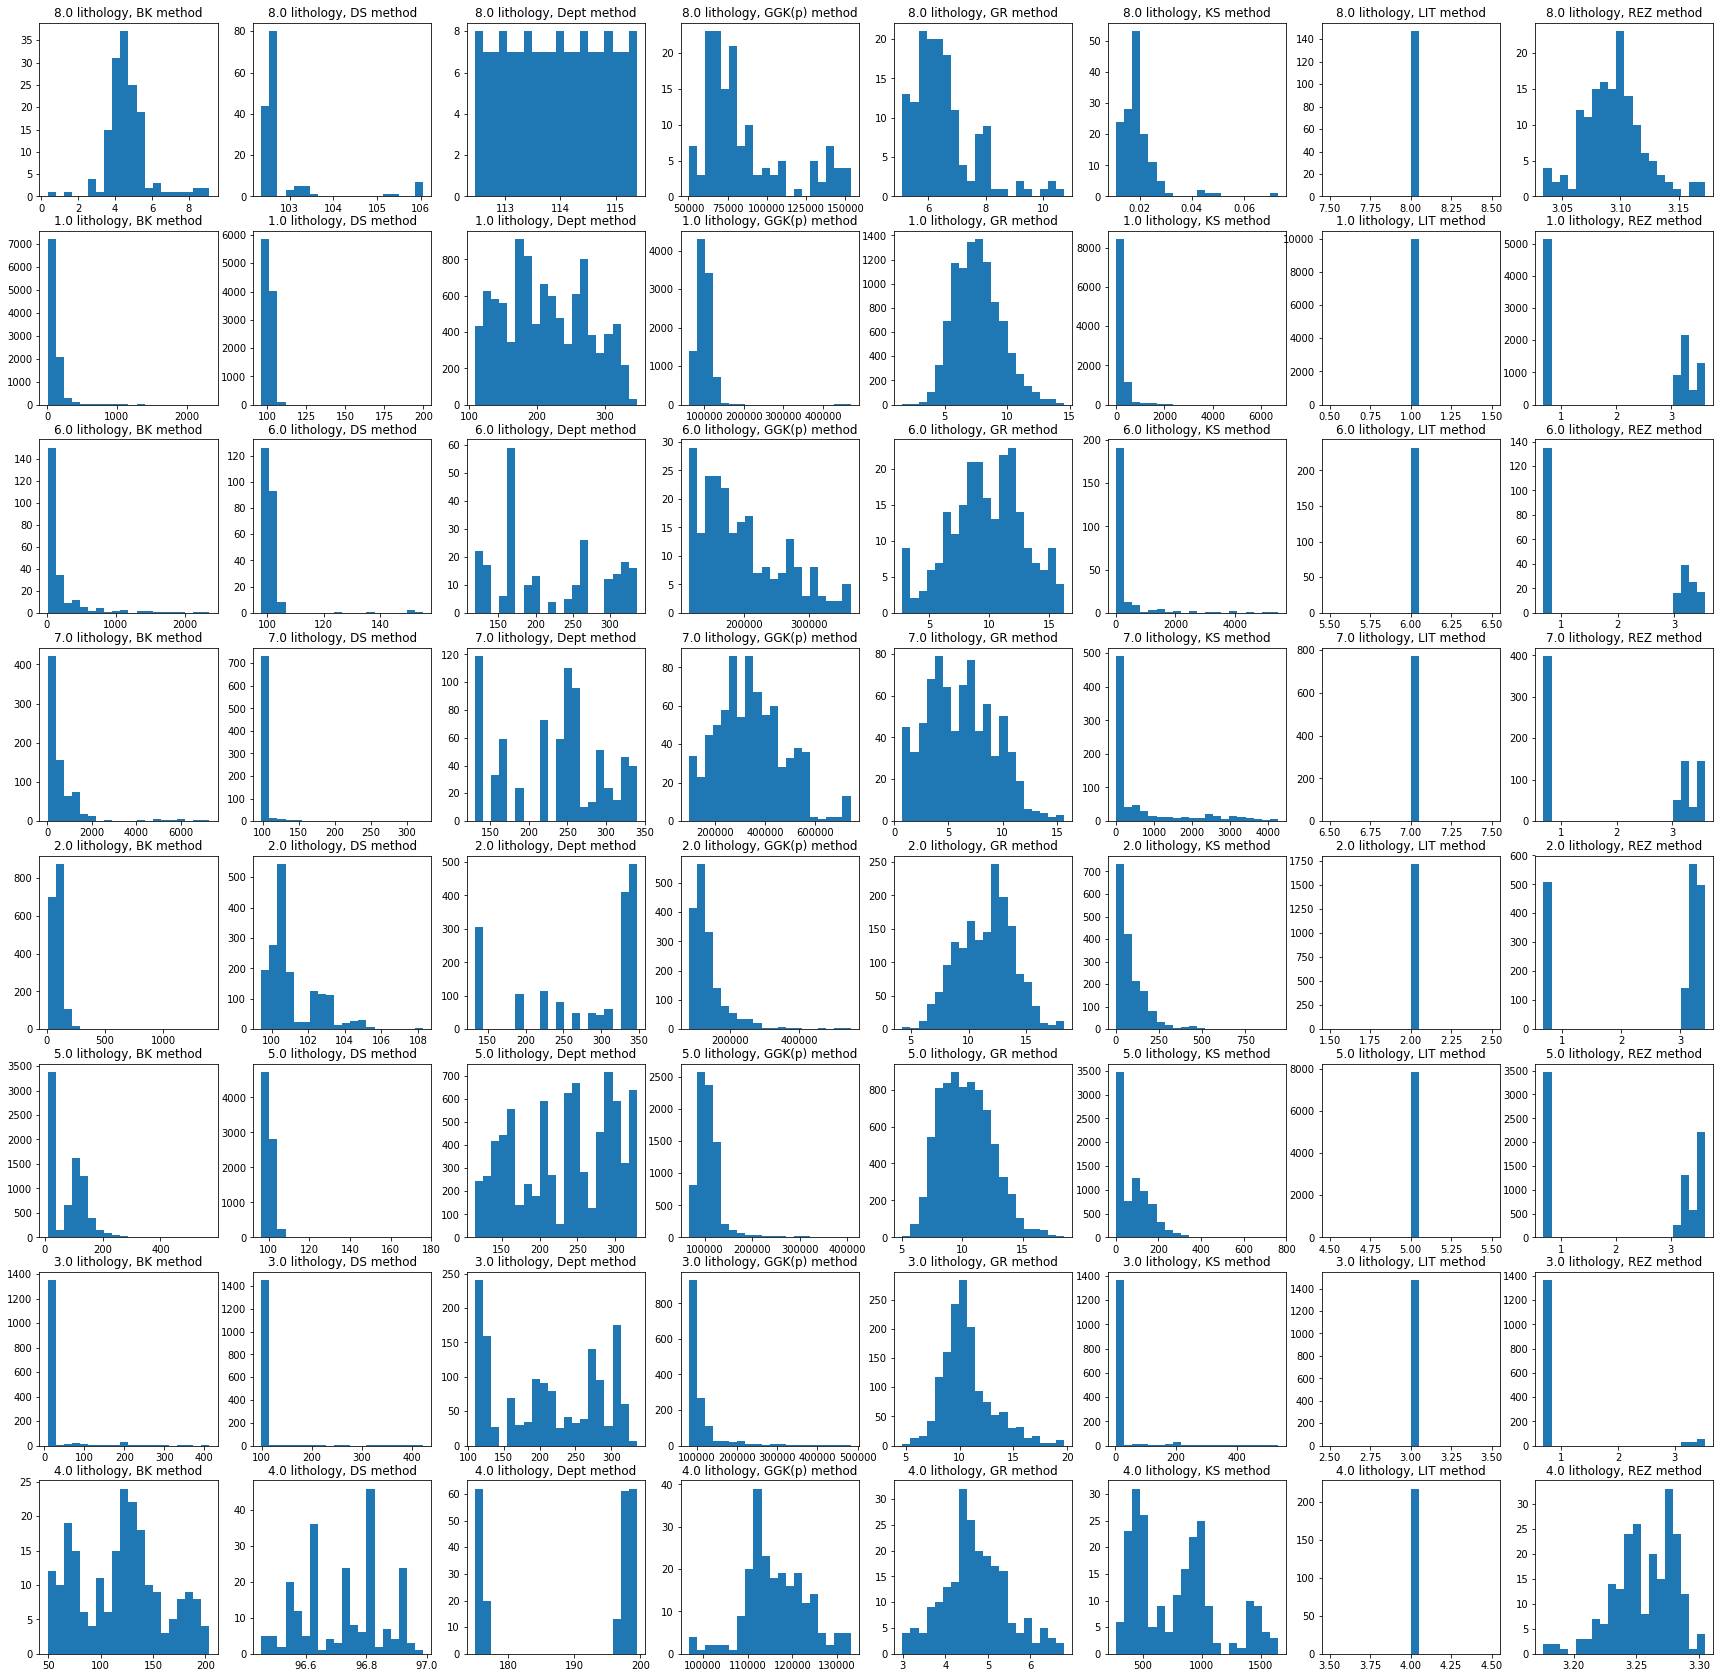

In [36]:
fig, axis = plt.subplots(len(counts), len(counts[1]), figsize=(30, 30))
for i, val_d in enumerate(counts.items()):
    for j, val in enumerate(val_d[1].items()):
        axis[i, j].hist(val[1], bins=20)
        axis[i, j].set_title('{} lithology, {} method'.format(val_d[0], val[0]))
plt.savefig('fig.png')

- GR Подчиняется нормальному распределению
- GGK похожа на нормальное, но имеет тяжелые хвосты, а также выбросы
- KS и BK похожи на распределние Пуассона, за некоторым исключением

In [48]:
from sklearn.naive_bayes import GaussianNB

In [82]:
clf = RandomForestClassifier(n_estimators=10, class_weight='balanced')
clf.fit(x_train[['GR', 'GGK(p)', 'BK', 'KS']], y_train)
clf.score(x_test[['GR', 'GGK(p)', 'BK', 'KS']], y_test)

0.80238627889634606

In [83]:
clf.score(hiden_data.dropna()[X_data][['GR', 'GGK(p)', 'BK', 'KS']], hiden_data.dropna()[y_data])

0.54348550483172275

# Data analysis with more data

## Utility functions

In [1]:
from os import listdir

def load_dtfs(path='../data/digdes-data/coal-wells-2/'):
    csvs = [file for file in listdir(path) if file.endswith('.csv')]
    dtfs = dict()
    for csv in csvs:
        dtfs[csv[:-4]] = pd.read_csv(path + csv, sep=';', decimal=',', encoding='cp1251')
    return dtfs

In [150]:
## Try to convert data to float to find bullshit
def check_values_multiple_comas(dtfs, column):
    """
    Pass dictionary of dataframes to find bad dataframe and value
    """
    for name, dtf in dtfs.items():
        for val in dtf[column]:
            try:
                if type(val) == str:
                    float(val.replace(',', '.'))
            except:
                print(name, val)

In [154]:
def check_values_for_str(dtf, column):
    for val in dtf[column]:
        try:
            if type(val) == str:
                float(val)
        except:
            print(name, val)

## Load data

In [170]:
## Loading dataframes
dtfs_first = load_dtfs('../data/digdes-data/coal-wells-2/first-bath/')
dtfs_second = load_dtfs('../data/digdes-data/coal-wells-2/second-bath/')

len(dtfs_first), len(dtfs_second)

(24, 7)

In [171]:
## Concating dataframes
dtf_first = pd.concat([d for d in dtfs_first.values()], ignore_index=True)
dtf_second = pd.concat([d for d in dtfs_second.values()], ignore_index=True)

print(dtf_first.shape, dtf_second.shape)

print(dtf_first.columns)
print(dtf_second.columns)

(352137, 8) (65457, 8)
Index(['BK', 'DS', 'Dept', 'GGK(p)', 'GR', 'KS', 'LIT', 'REZ'], dtype='object')
Index(['BK', 'DS', 'DT', 'Dept', 'GGK(p)', 'GR', 'LIT', 'REZ'], dtype='object')


In [172]:
## filling na (they are -999.25 or -9999) values with np.nan
dtf_first[dtf_first == -999.25] = np.nan
dtf_second[dtf_second == -999.25] = np.nan
dtf_second[dtf_second == -9999] = np.nan
dtf_second[dtf_second == -998.25] = np.nan
dtf_second.REZ[dtf_second.REZ < 0] = np.nan

### Разные распределения GR
Получается, что до и после 100 метров разные распределения гамма каротажа

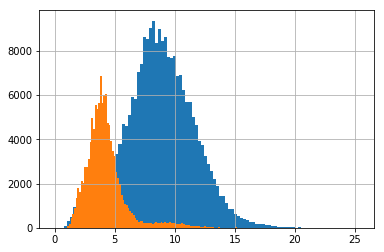

In [168]:
dtf_first.GR[dtf_first.Dept > 100].hist(bins=100)
dtf_first.GR[dtf_first.Dept < 100].hist(bins=100)

Дальше будем брать глубину больше 100 метров

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13896ceb8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x138f21c50>]], dtype=object)

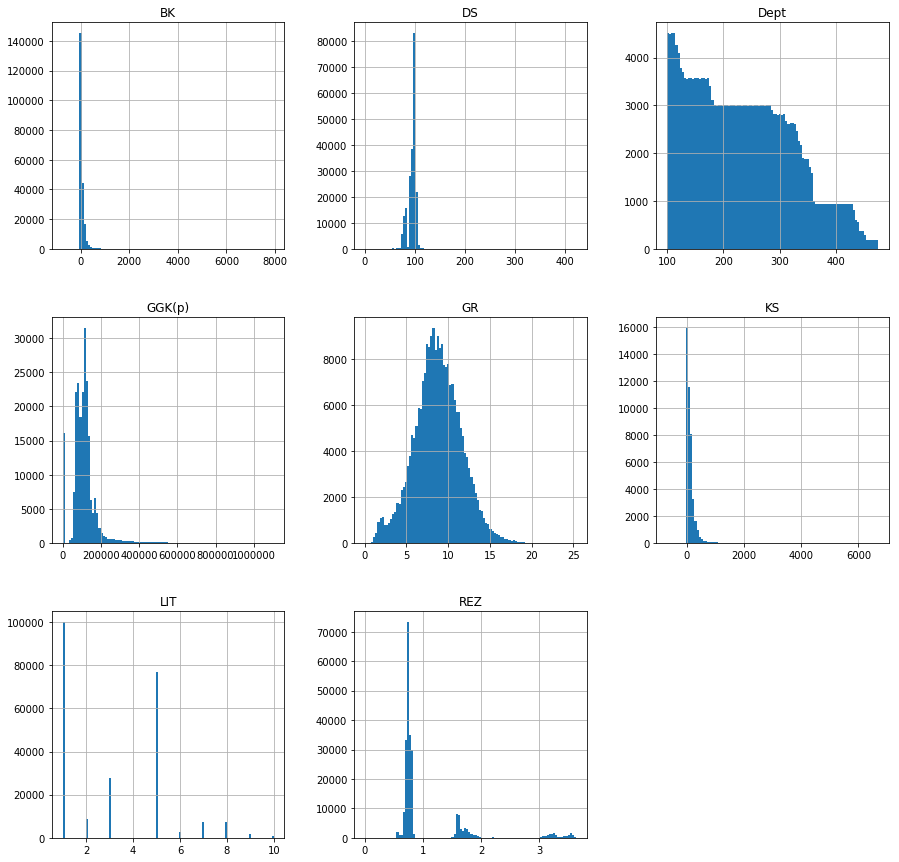

In [174]:
dtf_first[dtf_first.Dept > 100].hist(bins=100, figsize=(15, 15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cb0e1d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e2e6f28>]], dtype=object)

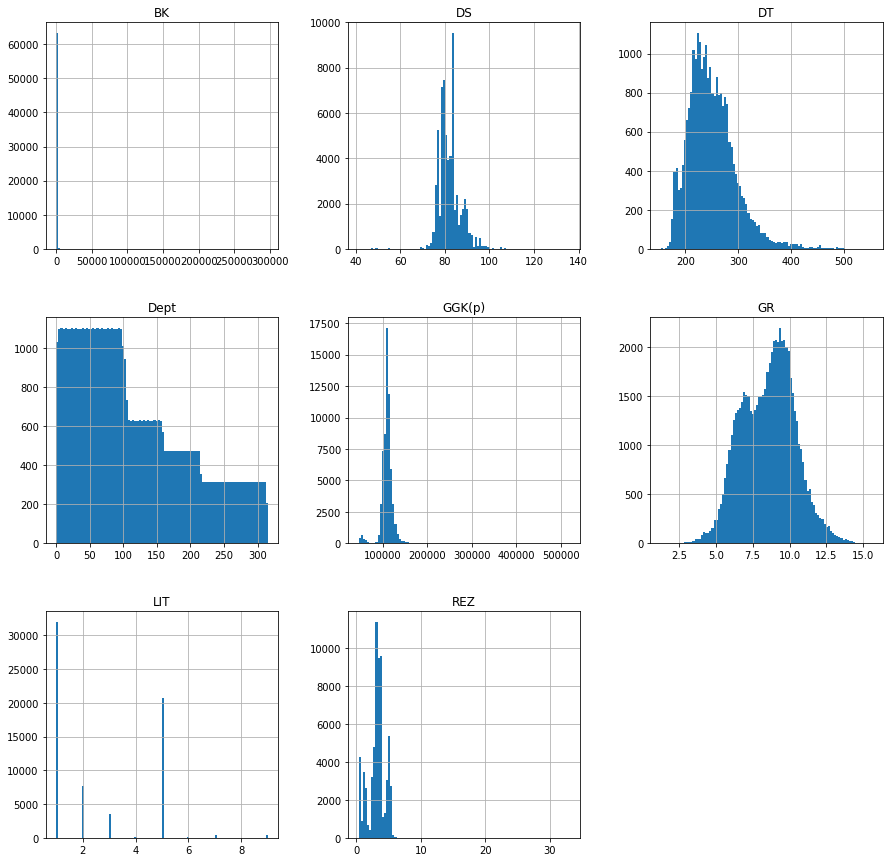

In [103]:
dtf_second.hist(bins=100, figsize=(15, 15))

In [175]:
dtf_first.describe()

,BK,DS,Dept,GGK(p),GR,KS,LIT,REZ
count,228129.000000,223998.000000,352137.000000,2.329290e+05,349868.000000,44657.000000,349091.000000,345506.000000
mean,67.886041,94.609916,172.925333,1.178712e+05,7.265676,146.383634,4.804406,1.003012
std,187.439784,8.972362,114.020210,7.976229e+04,3.307510,315.204314,3.149505,0.596339
min,-747.490000,0.000000,0.000000,4.720000e-01,0.000000,-690.270000,1.000000,0.000000
25%,13.545000,90.266000,75.820000,8.073500e+04,4.358000,2.966000,1.000000,0.749000
50%,22.591000,97.360000,156.500000,1.105557e+05,7.219000,91.540000,5.000000,0.799000
75%,59.145000,99.683000,262.420000,1.323000e+05,9.690000,157.649000,8.000000,0.827000
max,7957.280000,421.818000,475.300000,1.104800e+06,25.325000,6695.274000,11.000000,7.303000


In [96]:
dtf_second.describe()

,BK,DS,DT,Dept,GGK(p),GR,LIT,REZ
count,63505.000000,63930.000000,25110.000000,65457.000000,63909.000000,64506.000000,64834.000000,64585.000000
mean,268.917996,82.075471,250.877187,114.836784,109865.189076,8.559712,2.594056,3.237393
std,3077.141472,5.063080,45.308752,83.481744,20385.633364,1.808566,1.872433,1.331646
min,0.415000,41.160000,153.488000,0.160000,44781.664000,1.270000,1.000000,0.375000
25%,69.164000,78.900000,219.397000,47.120000,103605.000000,7.160000,1.000000,2.712000
50%,111.465000,81.160000,244.414000,93.870000,109510.000000,8.695000,2.000000,3.328000
75%,244.733000,83.830000,274.968750,171.840000,114640.000000,9.817000,5.000000,3.798000
max,296734.500000,136.110000,553.371000,314.980000,520681.188000,15.602000,9.000000,33.074000


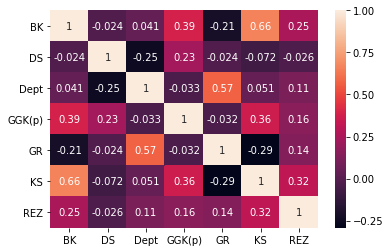

In [111]:
sns.heatmap(dtf_first.corr(), annot=True)

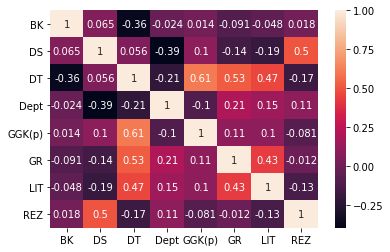

In [112]:
sns.heatmap(dtf_second.corr(), annot=True)

## Попробуем применить регрессию для того чтобы выразить DT через GGK и GR

In [136]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
gg_train, gg_test, dt_train, dt_test = train_test_split(dtf_second.dropna()[['GGK(p)', 'GR']], 
                                                        dtf_second.dropna()[['DT']],
                                                        test_size=0.3)

reg = RandomForestRegressor(n_estimators=10, max_features=2, max_depth=6)
reg.fit(gg_train, dt_train)

reg.score(gg_train, dt_train), reg.score(gg_test, dt_test)

/Volumes/Media/Documents/Programming/Git/(DD)-gitlab-projects/carrot/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


(0.74473792818575957, 0.74107277728925391)

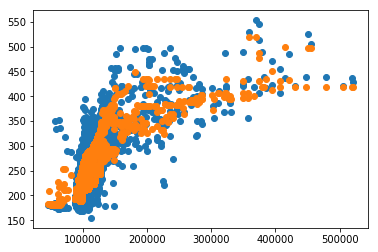

In [143]:
plt.plot(gg_test['GGK(p)'], dt_test, 'o')
plt.plot(gg_test['GGK(p)'], reg.predict(gg_test), 'o')

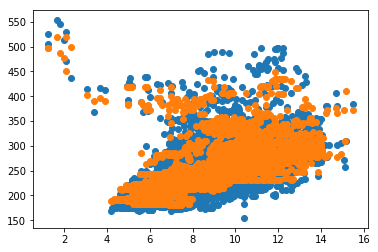

In [142]:
plt.plot(gg_test['GR'], dt_test, 'o')
plt.plot(gg_test['GR'], reg.predict(gg_test), 'o')

### Попробуем попрогнозировать

In [213]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [146]:
print(dtf_first.columns)
print(dtf_second.columns)

Index(['BK', 'DS', 'Dept', 'GGK(p)', 'GR', 'KS', 'LIT', 'REZ'], dtype='object')
Index(['BK', 'DS', 'DT', 'Dept', 'GGK(p)', 'GR', 'LIT', 'REZ'], dtype='object')


In [194]:
x_train, x_test, y_train, y_test = train_test_split(dtf_first.dropna()[['GGK(p)', 'GR', 'BK']], 
                                                    dtf_first.dropna()['LIT'],
                                                    test_size=0.3)

In [221]:
clf = RandomForestClassifier(max_depth=15)
clf.fit(x_train, y_train)

clf.score(x_train, y_train), clf.score(x_test, y_test)

(0.84320281262925689, 0.68291113791716929)

In [222]:
clf.score(dtf_second.dropna()[['GGK(p)', 'GR', 'BK']], dtf_second.dropna()['LIT'])

0.5079288610542374

In [228]:
print(classification_report(dtf_second.dropna()['LIT'], clf.predict(dtf_second.dropna()[['GGK(p)', 'GR', 'BK']])))

             precision    recall  f1-score   support

        1.0       0.78      0.69      0.73     12368
        2.0       0.23      0.01      0.01      4609
        3.0       0.29      0.17      0.22      2212
        5.0       0.30      0.66      0.41      5297
        6.0       0.08      0.09      0.08       129
        7.0       0.71      0.71      0.71       294
        8.0       0.00      0.00      0.00         0
        9.0       0.00      0.00      0.00         0

avg / total       0.53      0.51      0.48     24909



/Volumes/Media/Documents/Programming/Git/(DD)-gitlab-projects/carrot/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Результаты на текцщий момент показывают, что необходимо:
- Чистить данные от шумов
- Найти способ можелировать другие методы каротажа